In [14]:
import galarp as grp

from gala import potential as gp
from gala.units import galactic

from astropy import units as u

import numpy as np

from matplotlib import pyplot as plt

In [3]:

s1 = grp.SigmaGas(sigma = 20, nparticles=1)
print(s1.sigma, s1.nparticles)
s2 = grp.SigmaGas(sigma = 4e-3 * u.g / u.cm **2, nparticles=10)
print(s2.sigma, s2.nparticles)
s3 = grp.SigmaGas(sigma = [20, 50, 80])
print(s3.sigma, s3.nparticles)
s4 = grp.SigmaGas(sigma = [1e-3, 1e-4, 1e-5] * u.g / u.cm **2)
print(s4.sigma, s4.nparticles)

[20.] solMass / pc2 1
[19.15380984 19.15380984 19.15380984 19.15380984 19.15380984 19.15380984
 19.15380984 19.15380984 19.15380984 19.15380984] solMass / pc2 10
[20. 50. 80.] solMass / pc2 3
[4.78845246 0.47884525 0.04788452] solMass / pc2 3


In [4]:
pot = grp.builtins.JZ2023_Satellite()

wind = grp.RPWind(units=galactic)
wind.init_from_inc(inclination=np.deg2rad(45), strength=800 * u.km/u.s)

rho = grp.Density(1e-26 * u.g / u.cm **3)


sigma_gas = grp.SigmaGas(sigma=1e-4 * u.g / u.cm **2, nparticles=100).sigma


particles = grp.UniformGrid(n_particles=20)
particles.generate(mass_profile=grp.gen_mass_profile(pot))

In [5]:
sim = grp.RPSim(wind=wind, potential=pot, method=grp.F_RPS_Surface_Density, shadow=grp.DynamicShadow(wind, depth=0.05))


orbits = sim.run(particles, sigma_gas=20 * u.Msun / u.pc **2)

grp.animated_hexbin_plot(orbits=orbits, outname="test_stuff.gif")

20.0 solMass / pc2 276
276
--------------------------------------------------------------------------------
------ Running GALA sim with  8.18e-01 kpc / Myr  wind at  0.79  degrees -------
------- Running for 500.0 Myr  at a timestep of  5.0 Myr  (100.0 steps) --------
--------------------------------------------------------------------------------
----------------------- Container contains 276 particles -----------------------
- Each cloud has a mass of  1.0e+05 solar masses  and a radius of  50.00 pc   --
------------- This corresponds to a density of 5.41e-23 g / cm3   --------------
--------------------------------------------------------------------------------


100%|██████████| 99/99 [00:07<00:00, 13.79it/s]


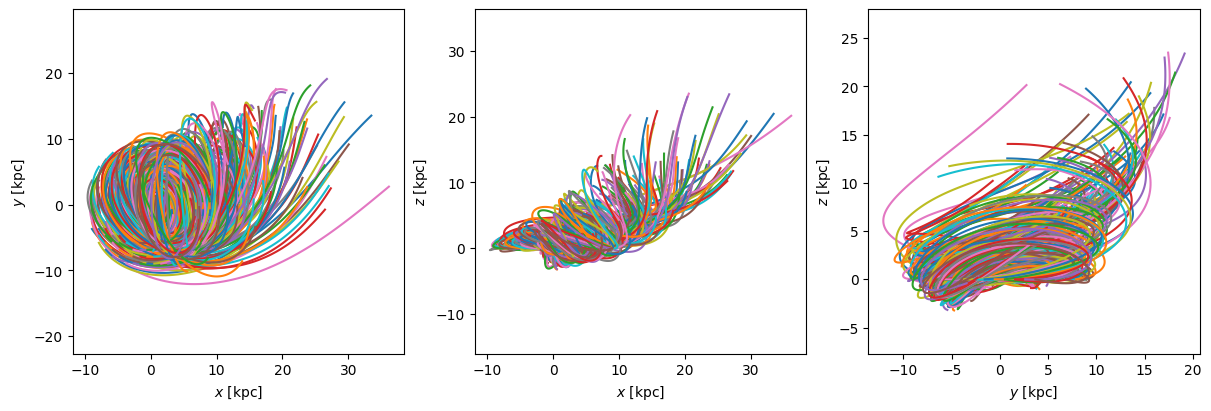

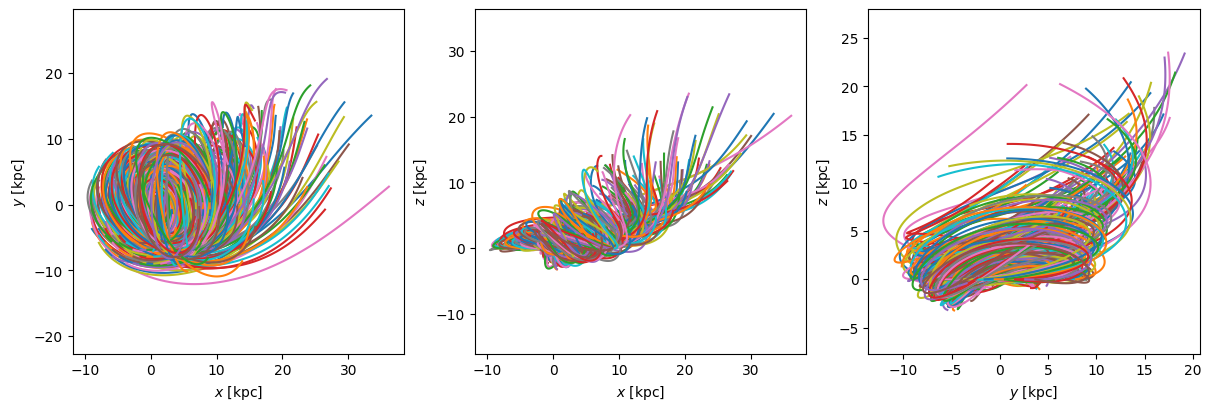

In [6]:
orbits.data.plot()

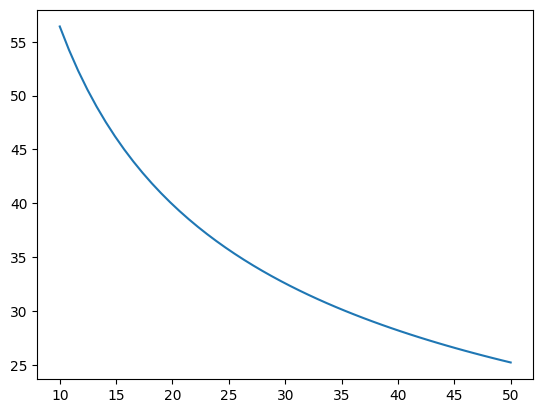

In [17]:

sigmas = np.linspace(10, 50, 50) * u.solMass / u.pc **2

mass = 1e5 * u.solMass

cloud_radii = np.sqrt(mass / sigmas / np.pi)

plt.plot(sigmas, cloud_radii)
